## Imports and Functions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import BayesianRidge

np.random.seed(2121)

In [2]:
df = pd.read_csv('../data/cleaned_flight_history.csv')
df_test = pd.read_csv('../data/cleaned_flight_test.csv')

In [3]:
# generate y and X dataframes
y_train = df.lateflight
y_test = df_test.lateflight

X_train = df[[col for col in df.columns if col != 'lateflight']]
X_test = df_test[[col for col in df_test.columns if col != 'lateflight']]

In [4]:
print(y_train.shape, y_test.shape, X_train.shape, X_test.shape)

(160505,) (5782,) (160505, 30) (5782, 30)


**Observation** Matches up!

## Standard Scale

In [5]:
# initialize
ss = StandardScaler()

# fit on Train
X_train_ss = pd.DataFrame(ss.fit_transform(X_train),
                          columns = X_train.columns,
                          index = X_train.index)

# transform test
X_test_ss = pd.DataFrame(ss.transform(X_test),
                         columns = X_test.columns,
                         index = X_test.index)

## RFE

In [6]:
rfecv = RFECV(
            estimator=BayesianRidge(),
            step = 1,
            cv = 5,
            scoring='r2',
            min_features_to_select=10)

rfecv.fit(X_train_ss,y_train)

cols_to_keep = X_train_ss.T[rfecv.ranking_==1].T.columns
cols_to_drop = X_train_ss.T[rfecv.ranking_!=1].T.columns

print(f'# of Columns Kept: {len(cols_to_keep)}')
print(f'# of Columns Dropped: {len(cols_to_drop)}')

# of Columns Kept: 22
# of Columns Dropped: 8


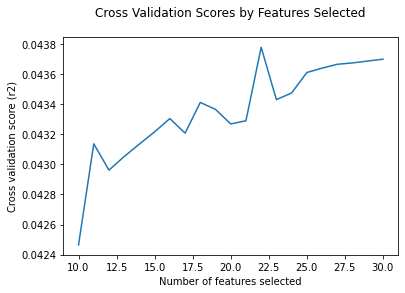

In [7]:
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.plot(
    range(10, len(rfecv.cv_results_['mean_test_score'])+10),
    rfecv.cv_results_['mean_test_score']
)
plt.title('Cross Validation Scores by Features Selected\n');

In [8]:
# look at cols to drop
cols_to_drop

Index(['minute', 'carrier_ua', 'carrier_ev', 'carrier_delayed_rate',
       'origin_lga', 'dest_lax', 'dest_mco', 'dest_clt'],
      dtype='object')

In [9]:
# drop cols
X_test_ss.drop(columns=cols_to_drop, inplace=True)
X_train_ss.drop(columns=cols_to_drop, inplace=True)

## Exports

In [10]:
y_train.to_csv('../data/y_train_processed.csv', index=False)
y_test.to_csv('../data/y_test_processed.csv', index=False)

X_train_ss.to_csv('../data/x_train_ss_processed.csv', index=False)
X_test_ss.to_csv('../data/x_test_ss_processed.csv', index=False)

## Archive

### SelectKBest (not used)

In [11]:
# # Create and fit selector
# selector = SelectKBest(k=20)
# selector.fit(X_train_ss, y_train)

In [12]:
# # Get columns to keep and create new dataframe with those only
# cols = selector.get_support(indices=True)

In [13]:
# X_train_feat_select = X_train_ss.iloc[:,cols]
# X_test_feat_select = X_test_ss.iloc[:,cols]

In [14]:
# removed_cols = [c for c in X_train_ss.columns if c not in X_train_feat_select.columns]
# X_train_feat_removed = X_train_ss.loc[:,removed_cols]
# X_test_feat_removed = X_test_ss.loc[:,removed_cols]

In [15]:
# # Selected Columns
# X_train_feat_select.columns